In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.chdir('/content/gdrive/My Drive')

### Task 1

In [3]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [4]:
df = pd.read_csv("annual-motor-vehicle-inspection-passing-rate-of-motor-vehicles-on-first-inspection.csv")
df.head()

,year,type,age,number_reported,number_passed,passing_rate
0,2006,Cars,1,455,432,94.9
1,2006,Cars,2,1082,1026,94.8
2,2006,Cars,3,73558,68432,93.0
3,2006,Cars,4,627,560,89.3
4,2006,Cars,5,17963,16716,93.1


In [5]:
# Check for null values
df.isnull().sum()

year               0
type               0
age                0
number_reported    0
number_passed      0
passing_rate       0
dtype: int64

In [6]:
# Check unique values in each column
df.apply(lambda x: x.unique(), axis=0)

year               [2006, 2007, 2008, 2009, 2010, 2011, 2012, 201...
type               [Cars, Motorcycles, Scheduled Buses, Other Bus...
age                             [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, >10]
number_reported    [455, 1082, 73558, 627, 17963, 231, 4751, 2010...
number_passed      [432, 1026, 68432, 560, 16716, 209, 4377, 212,...
passing_rate       [94.9, 94.8, 93.0, 89.3, 93.1, 90.5, 92.1, 91....
dtype: object

In [7]:
# Drop redundant columns
df.drop(columns=['number_reported', "number_passed"], inplace=True)

In [8]:
# What's the average passing rate on first inspection each year, taking into account motorcycles of all age groups?
motorcycles = df.loc[df["type"] == "Motorcycles"]
motorcycles = motorcycles.loc[~(motorcycles['passing_rate'] == 0)]
passing_rate = motorcycles.groupby("year")["passing_rate"].mean()
passing_rate

year
2006    92.990909
2007    93.686925
2008    93.870527
2009    93.873521
2010    93.981256
2011    94.045351
2012    92.791833
2013    89.050335
2014    91.428142
2015    95.105223
2016    96.257331
2017    96.365440
Name: passing_rate, dtype: float64

In [9]:
# Remove >10 as it is ambiguous how old and which group of vehicle it belongs to in previous years
motorcycles = motorcycles.loc[~(motorcycles['age'] == ">10")]
# Converting age to integer
motorcycles["age"] = motorcycles["age"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
# Matches the vehicle at each group in 2017 with their previous years
# i.e. For age 5 in 2017, we want to find age 4 in 2016, age 3 in 2015
motorcycles["diff"] = motorcycles["year"].apply(lambda x: 2017-x)
# Here we ensure all the data we need for that age group is bumped to that age
# i.e. following previous example, age 4 in 2016 will be bumped to age 5 and age 3 in 2015 to age 5
# This allows us to group the progress of the vehicle over time
motorcycles["new_age"] = motorcycles["age"] + motorcycles["diff"]
motorcycles.head()

,year,type,age,passing_rate,diff,new_age
11,2006,Motorcycles,1,95.9,11,12
12,2006,Motorcycles,2,93.8,11,13
13,2006,Motorcycles,3,92.8,11,14
14,2006,Motorcycles,4,93.6,11,15
15,2006,Motorcycles,5,92.1,11,16


In [11]:
# Since we are predicting next year, we filter the year 2017
current = motorcycles.loc[motorcycles['year'] == 2017]
# Left join is to ensure that all the vehicle belonging to the same group has the same current age in 2017
# i.e. following previous example, age 5 in 2017, age 4 in 2016 and age 3 in 2015 will all be having new_age = 5
result = pd.merge(current, motorcycles,on='new_age',how='left')
result = result[["new_age", "passing_rate_y"]]
result.head()

,new_age,passing_rate_y
0,2,97.257665
1,3,97.142857
2,3,96.960015
3,4,95.317970
4,4,97.060553


In [ ]:
for i in result["new_age"].unique():
    df_i = list(result.loc[result["new_age"] == i]["passing_rate_y"])
    # TODO: Time Series with Differecing
    # For cases where the vehicle is new, no point estimating, might be better to just model on age i over all the years or just taking the average of data with that age.
    # Not completely sure what the question is looking for

In [19]:
# def forecast(series, diff, a, b):
#     # Can try out different values of parameters after checking pacf plots (from statsmodels.graphics.tsaplots import plot_pacf, plot_pacf())
#     model = ARIMA(series, order=(a, diff, b))
#     results = model.fit()
#     fcast_res = results.get_forecast()
#     print(fcast_res.summary_frame(alpha=0.10))

# Note: summary will give the range required

In [ ]:
# def difference(series, iterations):
#     for i in range(iterations):
#         series = series.diff()[1:]
#     result = adfuller(series)
#     print('ADF Statistic: {}'.format(result[0]))
#     # P-value should be < 0.05, input the iterations into forecast function
#     print('p-value: {}'.format(result[1]))

### Task 2

In [ ]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df2 = pd.read_csv("cea-salespersons-property-transaction-records-residential.csv")
df2.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,salesperson_name,transaction_date,salesperson_reg_num,property_type,transaction_type,represented,town,district,general_location
0,MUHAMMAD NORIZZAM BIN KAMARUZAMAN,AUG-2018,R057250D,HDB,RESALE,BUYER,BUKIT PANJANG,-,-
1,LIM JOO HENG,AUG-2018,R011043H,HDB,RESALE,SELLER,BUKIT PANJANG,-,-
2,WONG TSU HAW,MAY-2017,R045055G,HDB,RESALE,SELLER,BUKIT PANJANG,-,-
3,TAY BEE KIAT,JUL-2018,R056733J,HDB,RESALE,SELLER,BUKIT PANJANG,-,-
4,SNG KIM ENG ANGELA,JAN-2017,R045695D,HDB,RESALE,BUYER,SENGKANG,-,-


In [ ]:
# Check for null values
df2.isnull().sum()

salesperson_name       0
transaction_date       0
salesperson_reg_num    0
property_type          0
transaction_type       0
represented            0
town                   0
district               0
general_location       0
dtype: int64

In [ ]:
# Only retain the year value in transaction date
df2["transaction_date"] = df2["transaction_date"].apply(lambda x: x.split("-")[1])
# Convert sales person number to lowercase in the case of duplicates
df2["salesperson_reg_num"] = df2["salesperson_reg_num"].apply(lambda x: x.lower())
# Remove the "-" in salesperson_reg_num
df2 = df2.loc[~(df2['salesperson_reg_num'] == "-")]

In [ ]:
# How many sales would you expect an agent to close each year? 
count = df2.groupby(["salesperson_reg_num", "transaction_date"])["salesperson_name"].count().mean()
count

7.242878131381045

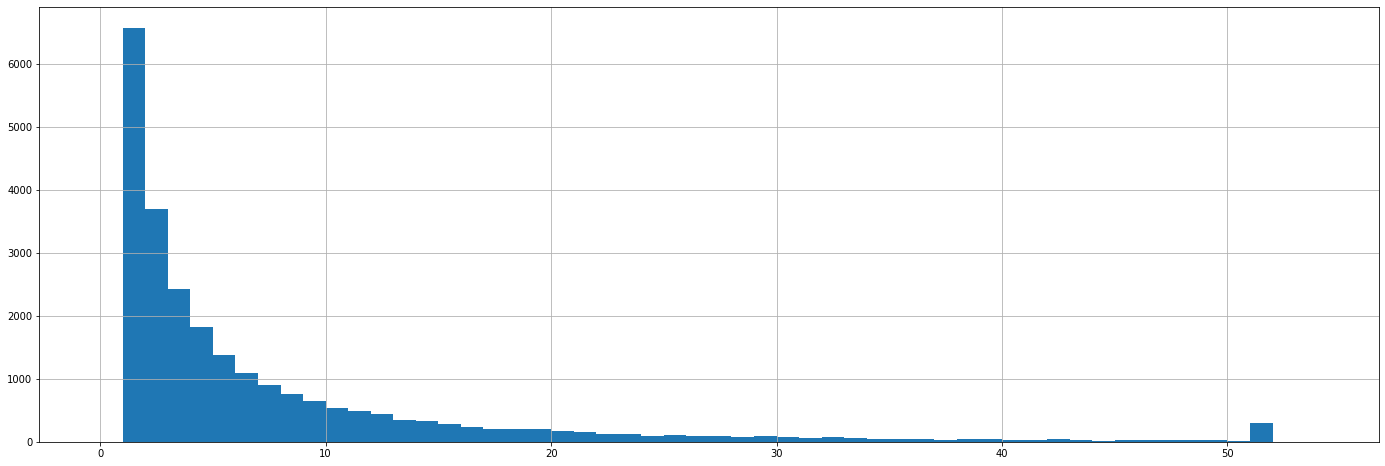

In [ ]:
# How much variation is there among agents?
df_tmp = df2.groupby(["salesperson_reg_num", "transaction_date"])["salesperson_name"].count().reset_index()
df_variation = df_tmp.groupby("salesperson_reg_num")["salesperson_name"].sum().reset_index()
df_variation.head()

fig, ax = plt.subplots(figsize=(24,8))
df_variation["Count"] = df_tmp["salesperson_name"].apply(lambda x: 51 if x > 50 else x)
df_variation["Count"].hist(bins=range(0, 50 + 5, 1))

# The variation between agents is right skewed meaning there are few agents who have much higher sales than the rest

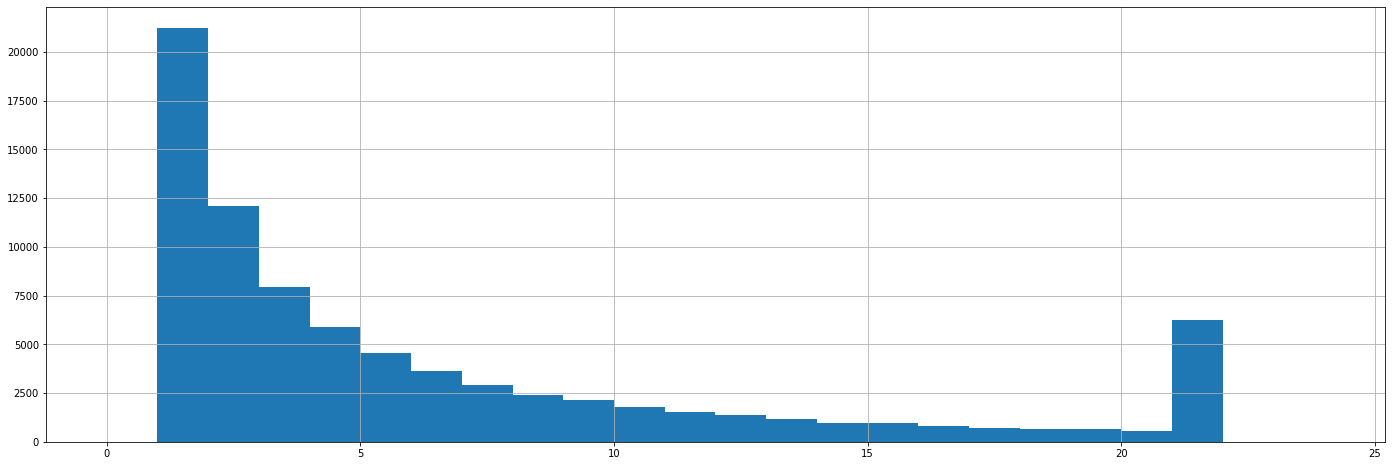

In [ ]:
# Plot the distribution of number of sales by an agent in a year
fig, ax = plt.subplots(figsize=(24,8))
# Since the tail is long, we will sum up the frequency after 20 and bin them into bin 21
df_tmp["Count"] = df_tmp["salesperson_name"].apply(lambda x: 21 if x > 20 else x)
df_tmp["Count"].hist(bins=range(0, 20 + 5, 1))

In [ ]:
# Find the mean and variance of the distribution. If mean = variance, we use Poisson, else Negative Binomial
mean = count
print("Mean: " + str(mean))
variance = sum((df_tmp["salesperson_name"] - mean) ** 2) / (len(df_tmp)-1)
print("Variance: " + str(variance))

Mean: 7.242878131381045
Variance: 140.83579874608782


In [ ]:
# We will use negative binomial. 
# Reason being the number of sales are discrete and has a long right tail (rare events)
# Also, since there is overdispersion as seen from mean != variance, negative binomial will be more suitable
# More specifically, we use a zero-truncated negative binomial as when agent do not make any sales, it will not be recorded hence it is not possible to have 0 sales.
# Limitation involves having more parameters to estimate.

In [ ]:
# Use apriori algorithm as association rule
# Find support of event A where event A is the salesperson transact in Yishun and Sembawang
A = df2.groupby("salesperson_reg_num")["town"].sum().reset_index(name='town_list')
A["visited"] = A["town_list"].apply(lambda x: 1 if (("YISHUN" in x) and ("SEMBAWANG" in x)) else 0)
support = len(A.loc[A["visited"] == 1]) / len(A)

In [ ]:
# Find the confidence of event A and B where B is the event that the salesperson visited town X
visited = A.loc[A["visited"] == 1]
dic = {}
for i in df2["town"].unique():
    C = visited.copy()
    B = A.copy()
    C["visited"] = C["town_list"].apply(lambda x: 1 if (i in x) else 0)
    B["visited"] = B["town_list"].apply(lambda x: 1 if (i in x) else 0)
    if len(C.loc[C["visited"] == 1]) > 0:
        dic[i] = len(C.loc[C["visited"] == 1]) / len(B.loc[B["visited"] == 1])
# Find the lift of event A on B, the higher the lift, the more likely the salesman visits town X if he visits Yishun and Sembawang
dic = {k: v/support for k, v in sorted(dic.items(), key=lambda item: item[1], reverse=True)}
dic 

{'SEMBAWANG': 7.790201005025127,
 'YISHUN': 4.056918547595682,
 'WOODLANDS': 3.219876766386099,
 'JURONG EAST': 3.2014636302001844,
 'BUKIT PANJANG': 3.124044181366861,
 'CHOA CHU KANG': 3.0811426613118043,
 'BISHAN': 2.952837995364156,
 'PASIR RIS': 2.935930268355379,
 'BUKIT BATOK': 2.9227766402704787,
 'SERANGOON': 2.9070595766016876,
 'ANG MO KIO': 2.824173707432246,
 'CENTRAL AREA': 2.7217518999472055,
 'JURONG WEST': 2.713870194728869,
 'GEYLANG': 2.6849963822929688,
 'CLEMENTI': 2.6728540854705853,
 'HOUGANG': 2.651080945717782,
 'TOA PAYOH': 2.645836892131679,
 'PUNGGOL': 2.59403328290469,
 'MARINE PARADE': 2.545068412738562,
 'KALLANG/WHAMPOA': 2.4802438573753425,
 'SENGKANG': 2.465228897795883,
 'BEDOK': 2.3929326443760046,
 'TAMPINES': 2.3486819108447685,
 'QUEENSTOWN': 2.329785371503477,
 'BUKIT MERAH': 2.3294092339466546,
 'BUKIT TIMAH': 2.1974076951384065,
 '-': 1.118026739690351}

In [ ]:
# Woodlands, Jurong East and Bukit Panjang is the highest which meakes sense since they are nearer to Yishun and Sembawang.

### Task 3 (Classification)

In [ ]:
!pip install pykml
!pip install xgboost --upgrade
# Importing packages
from pykml import parser
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 116 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255.9 MB 43 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
# Parse kml file
kml_file = "wireless-hotspots-kml.kml"
with open(kml_file) as f:
    doc = parser.parse(f)

In [ ]:
# Loading data into list 
Y, X, location_name, location_type, postal_code = [], [], [], [], []
address, operator, inc, fmel= [], [], [], []
coord = []

for tags in doc.getroot().Document.Folder.Placemark:      
    for tmp in tags.ExtendedData.SchemaData.SimpleData:
        if tmp.attrib.get('name') == "Y":
            Y.append(tmp.text)
        elif tmp.attrib.get('name') == "X":
            X.append(tmp.text)
        elif tmp.attrib.get('name') == "LOCATION_NAME":
            location_name.append(tmp.text)
        elif tmp.attrib.get('name') == "LOCATION_TYPE":
            location_type.append(tmp.text)
        elif tmp.attrib.get('name') == "POSTAL_CODE":
            postal_code.append(tmp.text)
        elif tmp.attrib.get('name') == "STREET_ADDRESS":
            address.append(tmp.text)
        elif tmp.attrib.get('name') == "OPERATOR_NAME":
            operator.append(tmp.text)
        elif tmp.attrib.get('name') == "INC_CRC":
            inc.append(tmp.text)
        elif tmp.attrib.get('name') == "FMEL_UPD_D":
            fmel.append(tmp.text)
    
    for tmp in tags.Point.coordinates:
        coord.append(tmp.text.split(" "))

In [ ]:
# Converts kml file into pandas dataframe
df3 = pd.DataFrame(list(zip(Y, X, location_name, location_type, postal_code, address, operator, inc, fmel, coord)), columns=["Y", "X", "Name", "Type", "Postal", "Address", "Operator", "Inc", "Fmel", "Coord"])
df3["Coord"] = df3["Coord"].apply(lambda x: x[0])
coord1 = df3["Coord"].str.split(",", expand = True)
df3["Longitude"] = coord1[0]
df3["Latitude"] = coord1[1]
df3.drop(columns =["Coord"], inplace = True)
df3.head()

,Y,X,Name,Type,Postal,Address,Operator,Inc,Fmel,Longitude,Latitude
0,36922.92412,18450.95232,Bukit Batok CC,Community,659959,21 Bukit Batok Central,M1,9BB55356462956EF,20200318162531,103.747514398535,1.35019080604781
1,45530.46595,28308.65184,1 Northpoint Drive,Community,768019,1 Northpoint Drive,M1,BD725D1716D3959C,20200318162531,103.836092102185,1.42803584532257
2,31394.65632,30187.62071,155 Waterloo St,Government,187962,155 Waterloo Street,M1,05EF8371C69FD210,20200318162531,103.852975339767,1.3001965525977
3,29861.29437,29464.67939,20 Upper Pickering St,Community,058284,20 Upper Pickering Street,M1,AD6A8E558E96E20B,20200318162531,103.846479315186,1.28632940482837
4,42345.17715,34269.36498,7 Star Canteen,F&B,540338,338 Anchorvale Crescent,M1,67FF233DF9721356,20200318162531,103.88965392915,1.3992285612873


In [ ]:
# You can deduce the above columns for each hotspot.

In [ ]:
# Check for null values
df3.isnull().sum()

Y            0
X            0
Name         0
Type         0
Postal       0
Address      0
Operator     0
Inc          0
Fmel         0
Longitude    0
Latitude     0
dtype: int64

In [ ]:
# Since first 2 digits are sector code in postal code, we use it as a new feature
df3["Sector"] = df3["Postal"].apply(lambda x: x[:2])
df3["Postal"] = df3["Postal"].apply(lambda x: int(x[2:]))

# Converts into appropriate data types
df3["Y"] = df3["Y"].astype("float64")
df3["X"] = df3["X"].astype("float64")
df3["Latitude"] = df3["Latitude"].astype("float64")
df3["Longitude"] = df3["Longitude"].astype("float64")

In [ ]:
# Visualization of correlation between target and features
pd.crosstab(index=df3['Operator'], columns=df3['Type'])

Type,Commercial,Community,Dormitory / Care Centre,F&B,Government,Healthcare,Public Transport,Public Worship,Retail Shop,School,Shopping Mall,Tourist Attraction,Welfare Organisation
Operator,,,,,,,,,,,,,
M1,45,554,4,198,15,360,2,2,17,2,7,12,122
MyRepublic,63,0,0,2,0,0,0,0,0,0,0,0,0
Singtel,13,2,0,226,8,55,44,0,5,0,0,0,0
StarHub,4,1,0,0,2,0,0,0,1,22,9,0,1


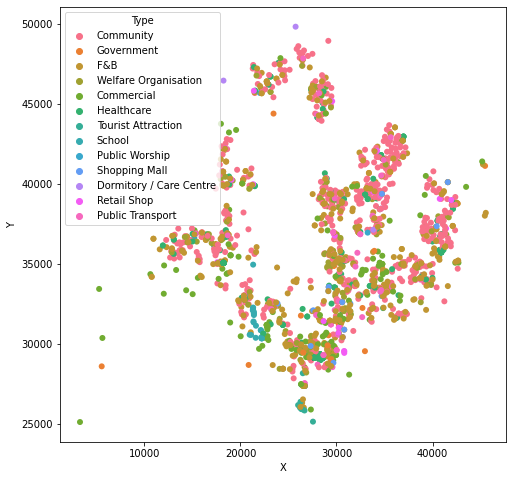

In [ ]:
# Visualization of correlation between X, Y and Type
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x='X', y='Y', data=df3, hue='Type', ec=None)

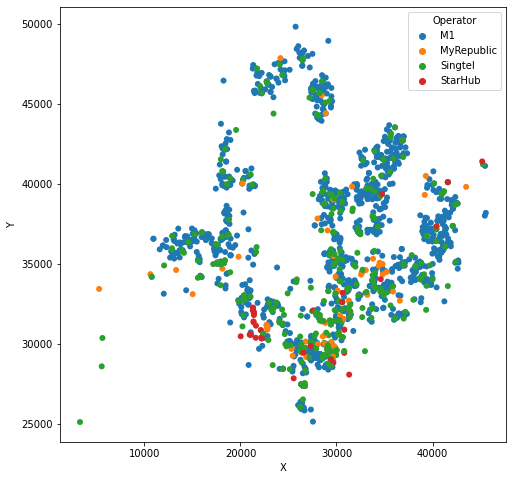

In [ ]:
# Visualization of correlation between X, Y and Operator
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x='X', y='Y', data=df3, hue='Operator', ec=None)

In [ ]:
# Drop redundant columns 
df3.drop(columns=['Name', "Address", "Fmel", "Inc"], inplace=True)
df3.head()

,Y,X,Type,Postal,Operator,Longitude,Latitude,Sector
0,36922.92412,18450.95232,Community,9959,M1,103.747514,1.350191,65
1,45530.46595,28308.65184,Community,8019,M1,103.836092,1.428036,76
2,31394.65632,30187.62071,Government,7962,M1,103.852975,1.300197,18
3,29861.29437,29464.67939,Community,8284,M1,103.846479,1.286329,05
4,42345.17715,34269.36498,F&B,338,M1,103.889654,1.399229,54


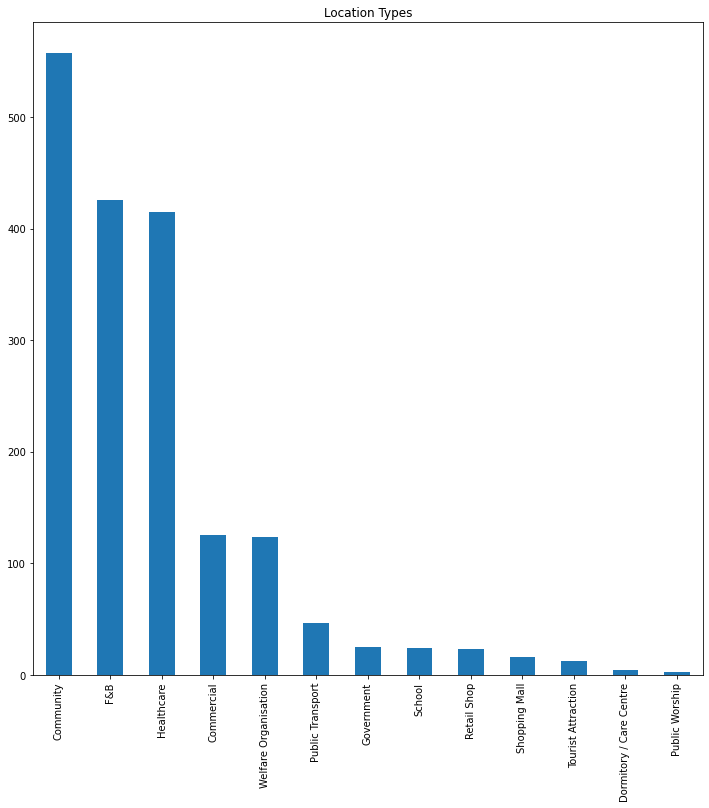

In [ ]:
# Find out the 3 rarest location types
fig, ax = plt.subplots(figsize=(12, 12))
df3['Type'].value_counts(sort=True).plot.bar(title='Location Types')

In [ ]:
# Replace the 3 rarest categories with Others
df3['Type'] = df3['Type'].replace(list(df3['Type'].value_counts(sort=True)[-3:].index), "Others")
df3.head()

,Y,X,Type,Postal,Operator,Longitude,Latitude,Sector
0,36922.92412,18450.95232,Community,9959,M1,103.747514,1.350191,65
1,45530.46595,28308.65184,Community,8019,M1,103.836092,1.428036,76
2,31394.65632,30187.62071,Government,7962,M1,103.852975,1.300197,18
3,29861.29437,29464.67939,Community,8284,M1,103.846479,1.286329,05
4,42345.17715,34269.36498,F&B,338,M1,103.889654,1.399229,54


In [ ]:
# Label encode the categorical variables for easy comprehension (can be used for XGBoost)
for i in df3.columns:
    if df3[i].dtype == "object":
        le = LabelEncoder()
        le.fit(df3[i])
        df3[i] = le.transform(df3[i])

In [ ]:
# Prepare data for training
y = df3["Type"]
y.astype("category")

X = df3.drop(columns=['Type'])
# Dropped as it does not seemed useful
X = X.drop(columns=['Postal'])
X = X.drop(columns=['Sector'])
X["Operator"].astype("category")

0       0
1       0
2       0
3       0
4       0
       ..
1793    2
1794    2
1795    2
1796    2
1797    2
Name: Operator, Length: 1798, dtype: category
Categories (4, int64): [0, 1, 2, 3]

In [ ]:
# Form train, val and test dataset
X_train, y_train = X.iloc[:-200, :], y[:-200]
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1, shuffle=True)
X_test, y_test = X.iloc[-200:, :], y[-200:]

In [ ]:
best_hyperparams

{'colsample_bytree': 0.7012312277016307,
 'gamma': 0.06281194578469285,
 'max_depth': 4.0,
 'min_child_weight': 0.0}

In [ ]:
# Model Training
clf = xgb.XGBClassifier(tree_method="gpu_hist", enable_categorical=True, use_label_encoder=False,
                        colsample_bytree=0.7012, gamma=0.0628, max_depth=4, min_child_weight=0)
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7012,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, gamma=0.0628, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=0,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [ ]:
# Validation
y_pred = clf.predict(X_val)
print(confusion_matrix(y_val, y_pred))
print(accuracy_score(y_val, y_pred))
print(f1_score(y_val, y_pred, average="weighted"))

[[12  2  3  0  0  0  0  0  0  0  0]
 [ 0 94  9  0  6  1  0  0  0  0  6]
 [ 1 26 30  0  1  0  1  0  0  2  0]
 [ 1  5  1  0  0  0  1  0  0  0  0]
 [ 0 15  4  0 56  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  3  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0]
 [ 0  1  0  0  0  0  0  0  0  1  0]
 [ 0 20  1  0  2  0  0  0  0  0  2]]
0.628125
0.6001590624287994


In [ ]:
# Testing on held-out dataset
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="weighted"))

# Weighted F1 Score is used due to class imbalance in the hold-out set. 
# This penalizes the model from predicting just the majority class by weighting by number of samples in each class.

[[ 1  0  4  1  0  1  0  1  0  0]
 [ 0  0  2  0  0  0  0  0  0  0]
 [ 0  0 95  0  0  7  2  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  4  0  0  0  0]
 [ 0  0  1  0  0  1  1  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  0]
 [ 0  0  1  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  1  0]]
0.56
0.4505096751344216


In [ ]:
# Helps increase the f1 score by a little
#!pip install hyperopt
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

# Search Space
space={'max_depth': hp.quniform("max_depth", 3, 10, 1),
        'gamma': hp.uniform ('gamma', 0,9),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 100,
        'seed': 0}
        
# Objective function to optimize
def objective(space):
    clf=xgb.XGBClassifier(n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    min_child_weight=int(space['min_child_weight']), colsample_bytree=int(space['colsample_bytree']))
    
    clf.fit(X_train, y_train, verbose=False)

    y_pred = clf.predict(X_val)
    accuracy = f1_score(y_val, y_pred, average="weighted")
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
# Run hyperparameter tuning
trials = Trials()
best_hyperparams = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 100, trials = trials)

SCORE:
0.5593191964285714
SCORE:
0.5505814513305323
SCORE:
0.5527190817805357
SCORE:
0.566340300640655
SCORE:
0.5488463153666375
SCORE:
0.558233075157774
SCORE:
0.5804770233653163
SCORE:
0.5602743965511974
SCORE:
0.5553280835766301
SCORE:
0.594296729325799
SCORE:
0.5608618843312663
SCORE:
0.5574078377641858
SCORE:
0.5652790386465152
SCORE:
0.5563439841800634
SCORE:
0.5457548307043265
SCORE:
0.5505814513305323
SCORE:
0.5600885427147378
SCORE:
0.5572098398472055
SCORE:
0.5505814513305323
SCORE:
0.5558894348579626
SCORE:
0.5609789716750562
SCORE:
0.5633311439894075
SCORE:
0.5850895304736762
SCORE:
0.5618675829421533
SCORE:
0.5874107493952384
SCORE:
0.5896941424970458
SCORE:
0.5607287338588129
SCORE:
0.5937892092210343
SCORE:
0.5696645415668474
SCORE:
0.5530764544747501
SCORE:
0.5683133103856484
SCORE:
0.5668034024465303
SCORE:
0.594730906067113
SCORE:
0.5558465948118366
SCORE:
0.5628993925414477
SCORE:
0.5731529474514847
SCORE:
0.5624450552338321
SCORE:
0.5875208461617405
SCORE:
0.5515327

### Task 4 (Data Visualisation)

In [ ]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load data given in question
col_name = ["Salary", "Count", "Group", "Industry", "Job Nature"]
salary = [3150, 3300, 2650, 2400, 4100, 3400, 2800, 2300, 2900, 3000, 3100, 2600, 2400, 3900, 3150, 2600, 2200, 1900]
count = [83, 53, 47, 12, 30, 23, 12, 8, 21, 23, 9, 32, 15, 3, 7, 22, 21, 28]
group = ["X", "X", "X", "X", "X", "X", "X", "X", "X", "Y", "Y", "Y", "Y", "Y", "Y", "Y", "Y", "Y"]
industry = ["A", "B", "C", "D", "E", "F", "G", "H", "Others", "A", "B", "C", "D", "E", "F", "G", "H", "Others"]
nature = ["Close", "Close", "Close", "Close", "Somewhat", "Somewhat", "Somewhat", "Somewhat", "Unrelated", "Close", "Close", "Close", "Close", "Somewhat", "Somewhat", "Somewhat", "Somewhat", "Unrelated"]

In [ ]:
# Load in dataframe
df4 = pd.DataFrame(list(zip(salary, count, group, industry, nature)), columns=col_name)
df4.head()

,Salary,Count,Group,Industry,Job Nature
0,3150,83,X,A,Close
1,3300,53,X,B,Close
2,2650,47,X,C,Close
3,2400,12,X,D,Close
4,4100,30,X,E,Somewhat


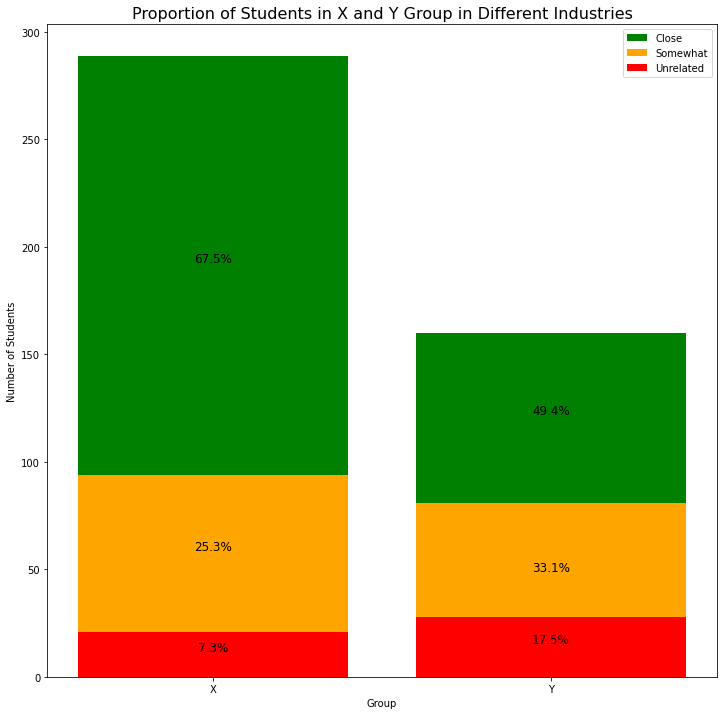

In [ ]:
# To answer the main insight: Considerable proportion of students from each group do not go on to work in industries closely related to it.
# There are considerably more students from Group X than Group Y in this course of study.
# Proportionately more students from Group Y are in jobs unrelated to their course of study.

# Sum the number of students in each unique (group, job_nature)
group_jn = df4.groupby(["Group", "Job Nature"]).sum().reset_index()
# Sum the number of students in each unique group
group = group_jn.groupby(["Group"]).sum().reset_index()
# Left join percentage to (group, job_nature)
percent = group_jn.merge(group, on='Group', how='left')
# Find the percentage of each unique (group, job_nature)
group_jn["Percentage"] = round(percent["Count_x"] / percent["Count_y"], 3) * 100

# Groups in the table
x = group_jn.loc[group_jn["Job Nature"] == "Close"]["Group"]
# Number of students in close industry
close = np.array(group_jn.loc[group_jn["Job Nature"] == "Close"]["Count"])
# Number of students in somewhat industry
somewhat = np.array(group_jn.loc[group_jn["Job Nature"] == "Somewhat"]["Count"])
# Number of students in unrelated industry
unrelated = np.array(group_jn.loc[group_jn["Job Nature"] == "Unrelated"]["Count"])

# Percentage of students in close industry
percent1 = group_jn.loc[group_jn["Job Nature"] == "Close"]["Percentage"]
# Percentage of students in somewhat industry
percent2 = group_jn.loc[group_jn["Job Nature"] == "Somewhat"]["Percentage"]
# Percentage of students in unrelated industry
percent3 = group_jn.loc[group_jn["Job Nature"] == "Unrelated"]["Percentage"]

c1, c2 = 0, 0
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the stacked graphs
p1 = plt.bar(x, close, bottom=unrelated+somewhat, color='green', label="Close")
for rect, p in zip(p1, percent1):
    height1 = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height1/2+somewhat[c1]+unrelated[c1], str(p)+'%', ha='center', va='bottom', fontsize=12, color='black')
    c1 += 1
p2 = plt.bar(x, somewhat, bottom=unrelated, color='orange', label="Somewhat")
for rect, p in zip(p2, percent2):
    height2 = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height2/2+unrelated[c2], str(p)+'%', ha='center', va='bottom', fontsize=12, color='black')
    c1 += 1
p3 = plt.bar(x, unrelated, color='red', label="Unrelated")
for rect, p in zip(p3, percent3):
    height3 = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height3/2, str(p)+'%', ha='center', va='bottom', fontsize=12, color='black')

plt.title('Proportion of Students in X and Y Group in Different Industries', fontsize=16)
plt.xlabel('Group')
plt.ylabel('Number of Students')
plt.legend()

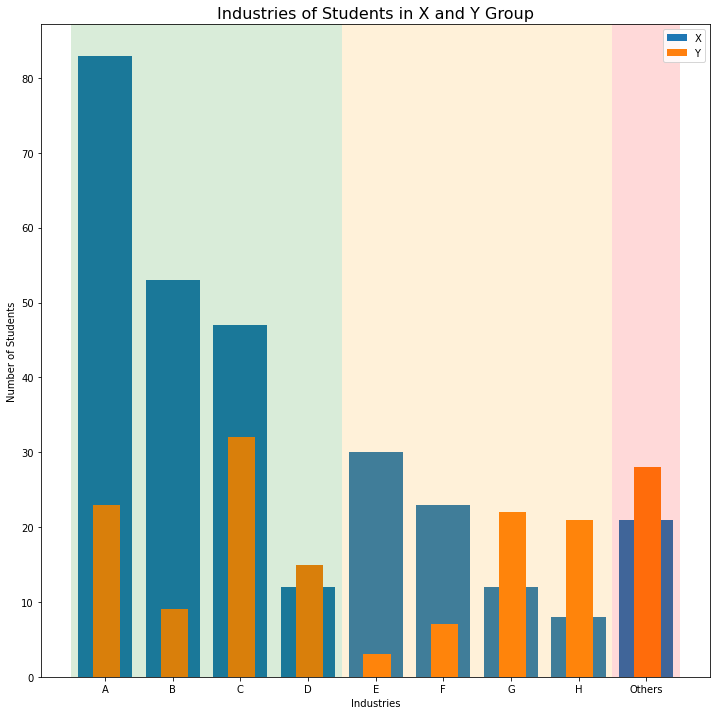

In [ ]:
# Distribution of students among various industries is considerably different between the two student groups.
width = 0.8
fig, ax = plt.subplots(figsize=(12, 12))

plt.bar(height="Count", x="Industry", data=df4.loc[df4["Group"]=="X"], label="X")
# Plot Y to be thinner else it will be covered
indices = np.arange(len(df4.loc[df4["Group"]=="X"]))
plt.bar([i+0.025*width for i in indices], height="Count", data=df4.loc[df4["Group"]=="Y"], label="Y", width=0.5*width)

# Color background according to closeness of industry to course of study
ax.axvspan(-0.5, 3.5, alpha=0.15, facecolor="g")
ax.axvspan(3.5, 7.5, alpha=0.15, facecolor="orange")
ax.axvspan(7.5, 8.5, alpha=0.15, facecolor="r")

plt.title('Industries of Students in X and Y Group', fontsize=16)
plt.xlabel('Industries')
plt.ylabel('Number of Students')
plt.legend()

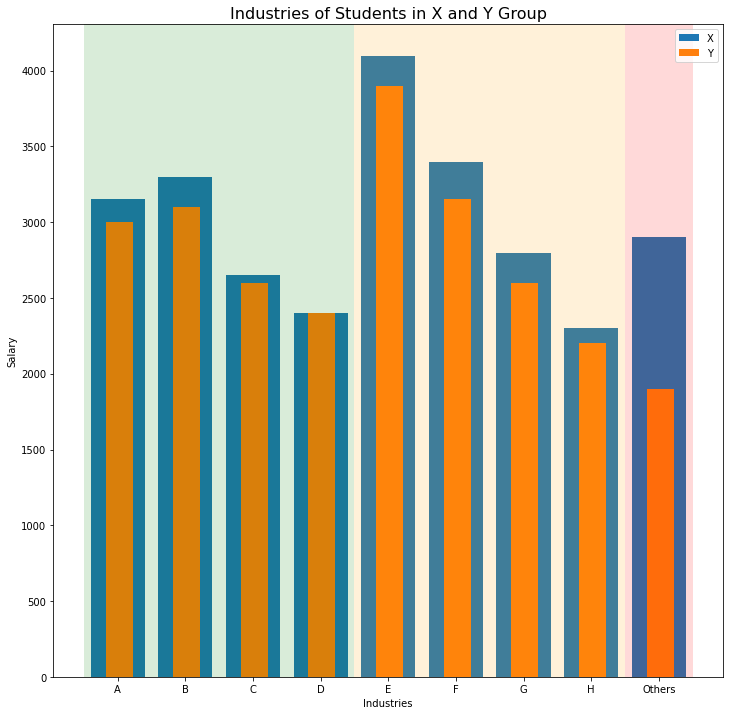

In [ ]:
# Students from Group X tend to command higher salaries, for the same type of job & industry.
# The salary differential between the two student groups differs by job nature and industry.
width = 0.8
fig, ax = plt.subplots(figsize=(12, 12))

plt.bar(height="Salary", x="Industry", data=df4.loc[df4["Group"]=="X"], label="X")
# Plot Y to be thinner else it will be covered
indices = np.arange(len(df4.loc[df4["Group"]=="X"]))
plt.bar([i+0.025*width for i in indices], height="Salary", data=df4.loc[df4["Group"]=="Y"], label="Y", width=0.5*width)

# Color background according to closeness of industry to course of study
ax.axvspan(-0.5, 3.5, alpha=0.15, facecolor="g")
ax.axvspan(3.5, 7.5, alpha=0.15, facecolor="orange")
ax.axvspan(7.5, 8.5, alpha=0.15, facecolor="r")

plt.title('Industries of Students in X and Y Group', fontsize=16)
plt.xlabel('Industries')
plt.ylabel('Salary')
plt.legend()